# Modellering i S1

Her skal me sjå kort på korleis me kan lesa inn, bearbeida og plotta store datasett.


In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
data = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv", 
    sep = ",",
    skiprows = 1,
    na_values="***"
    )

data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.24,-0.09,-0.16,-0.10,-0.21,-0.18,-0.10,-0.14,-0.24,-0.22,-0.18,-0.17,NaN,NaN,-0.12,-0.16,-0.20
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.03,-0.15,-0.22,-0.18,-0.07,-0.09,-0.10,-0.17,0.05,-0.07,-0.18
2,1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.08,-0.15,-0.23,-0.17,-0.36,-0.11,-0.09,0.08,-0.08,-0.15,-0.18
3,1883,-0.29,-0.37,-0.12,-0.19,-0.18,-0.07,-0.07,-0.14,-0.22,-0.11,-0.24,-0.11,-0.18,-0.20,-0.34,-0.16,-0.09,-0.19
4,1884,-0.13,-0.08,-0.36,-0.40,-0.33,-0.35,-0.33,-0.28,-0.27,-0.25,-0.33,-0.31,-0.28,-0.27,-0.11,-0.37,-0.32,-0.28


Her er me berre interessert i det årlege gjennomsnittet (frå januar til desember). Det finn me i kolonna "J-D". Me tar vare på kolonna "Year" og "J-D". 

In [87]:
data = data[["Year", "J-D"]]
data.head()

,Year,J-D
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.28


## Plottar data

For å visualisera datamaterialet plottar me det. Set namn på aksar og tittel.

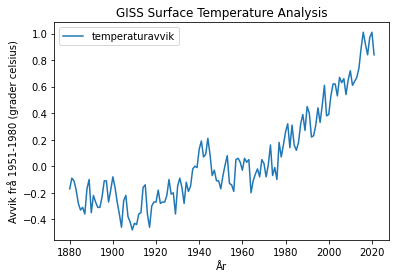

In [114]:
data.plot("Year", "J-D", label = "temperaturavvik")
plt.xlabel("År")
plt.ylabel("Avvik frå 1951-1980 (grader celsius)")
plt.title("GISS Surface Temperature Analysis")
plt.show()

## Glatting av datasettet

Ser at datasettet svingar veldig. Me kan glatta kurven ved å ta eit glidande ("rolling") gjennomsnitt ("mean"). Set `window = 10` som betyr at han tar eit gjennomsnitt av dei 5 forrige og 5 neste åra. 10 år til saman. Di større `window` di glattare vert kurven. 

In [135]:
data_glatt = data.rolling(window = 10).mean()

Plottar både datamaterialet og den glatta kurven i samme plott:

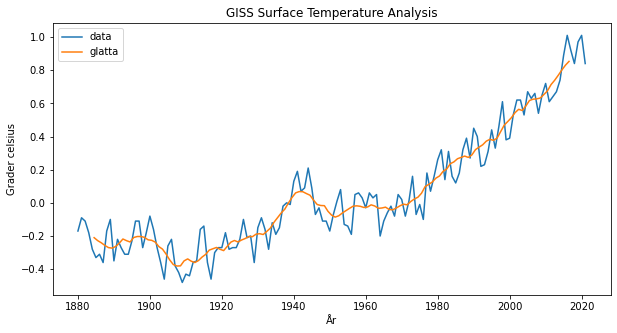

In [136]:
plt.figure(figsize = (10, 5))
plt.plot(data["Year"], data["J-D"], label = "data")
plt.plot(data_glatt["Year"], data_glatt["J-D"], label = "glatta")
plt.legend()
plt.xlabel("År")
plt.ylabel("Grader celsius")
plt.title("GISS Surface Temperature Analysis")
plt.show()

## Regresjon

Det er ulike funksjonar som kan utføra regresjon i Python. Her ser me på enkel polynomregresjon med `Numpy` sin `polyfit()` samt litt meir fleksibel regresjon med `curve_fit` frå `SciPy`. For å kunna utføra regresjon må me fjerna rader med verdiar som ikkje har verdiar (NaN). 


In [152]:
data_glatt = data_glatt.dropna()


### Polyfit

Denne kan me bruka til å finna polynomfunksjonar som passar til eit datasett. Me tar utgangspunkt i det glatta datasettet vårt frå over. Ser korleis eit andregradspolynom passar. 

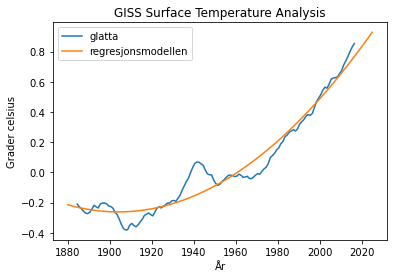

In [159]:
# K er koeffisientane a, b og c. 
K = np.polyfit(
        x = data_glatt["Year"], 
        y = data_glatt["J-D"],
        deg = 2
    )

# definerer andregradsfunksjonen
def f(x):
    return K[0]*x**2 + K[1]*x + K[2]

# definerer x-verdiar frå 1880 til 2025
x = np.linspace(1880, 2025, 300)

# plottar glatta kurve og regresjonsmodellen
plt.plot(data_glatt["Year"], data_glatt["J-D"], label = "glatta")
plt.plot(x, f(x), label = "regresjonsmodellen")
plt.legend()
plt.xlabel("År")
plt.ylabel("Grader celsius")
plt.title("GISS Surface Temperature Analysis")
plt.show()

Me kan sjå korleis denne modellen spår utviklinga fram mot 2100. Plottar data, glatta data og regresjonsmodellen saman: 

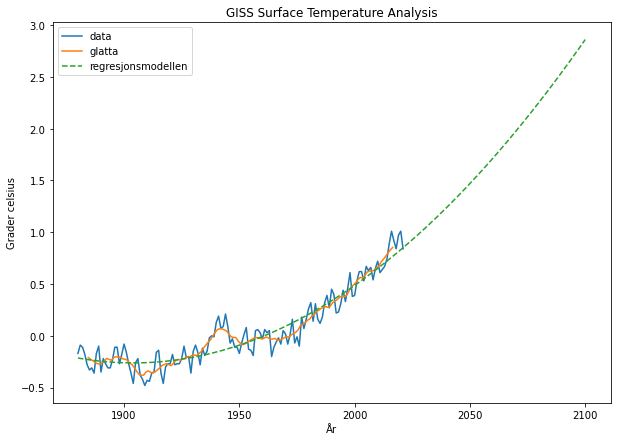

In [164]:
# definerer x-verdiar frå 1880 til 2100
x = np.linspace(1880, 2100, 300)

# plottar glatta kurve og regresjonsmodellen
plt.figure(figsize = (10, 7))
plt.plot(data["Year"], data["J-D"], label = "data")
plt.plot(data_glatt["Year"], data_glatt["J-D"], label = "glatta")
plt.plot(x, f(x), "--", label = "regresjonsmodellen")
plt.legend()
plt.xlabel("År")
plt.ylabel("Grader celsius")
plt.title("GISS Surface Temperature Analysis")
plt.show()

### Curve_fit

Her kjem døme på bruk av curve_fit...


## Kjelder 

- GISTEMP Team, 2022: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 2022-06-21 at https://data.giss.nasa.gov/gistemp/.

- Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi:10.1029/2018JD029522.